In [1]:
import numpy as np
import ceo
from ceo.pyramid import Pyramid as Pym
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
N_SIDE_LENSLET=92
n = N_SIDE_LENSLET*32
gmt = ceo.GMT_MX()

In [45]:
src = ceo.Source('V',zenith=0,azimuth=0,
                rays_box_size=25.5,
                rays_box_sampling=n,
                rays_origin=[0,0,25])
src>>(gmt,)
+src
src.wavefront.rms(-9)

array([0.75929901])

In [46]:
pym = Pym(N_SIDE_LENSLET,n,modulation=0.0,separation=2)
src>>(gmt,pym)

(@CEO)>Pyramid: Set modulation sampling to 0


In [52]:
132/92

1.434782608695652

In [53]:
pym.camera.reset()
pym.separation = 132/92

In [54]:
%%time
+src

CPU times: user 521 ms, sys: 0 ns, total: 521 ms
Wall time: 520 ms


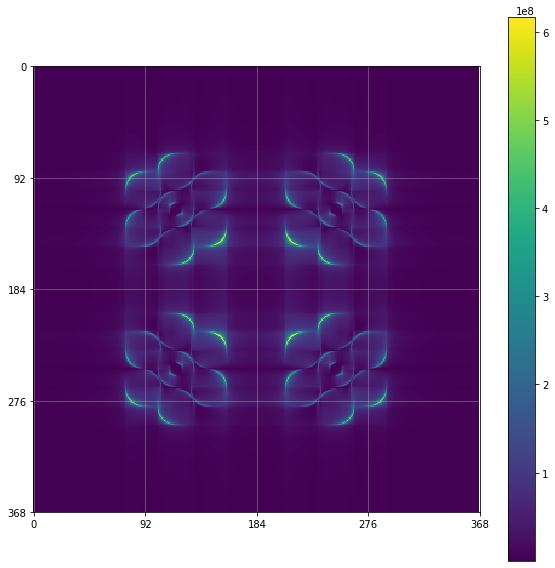

In [55]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()
u = np.arange(0,pym.camera.frame.host().shape[0]*5/4,pym.camera.frame.host().shape[0]/4)
plt.xticks(u)
plt.yticks(u)
plt.grid(alpha=0.5)

In [50]:
pym.camera.frame.host().shape[0]

368

In [17]:
src.rays.rot_angle = np.pi/12
pym.camera.reset()
+src

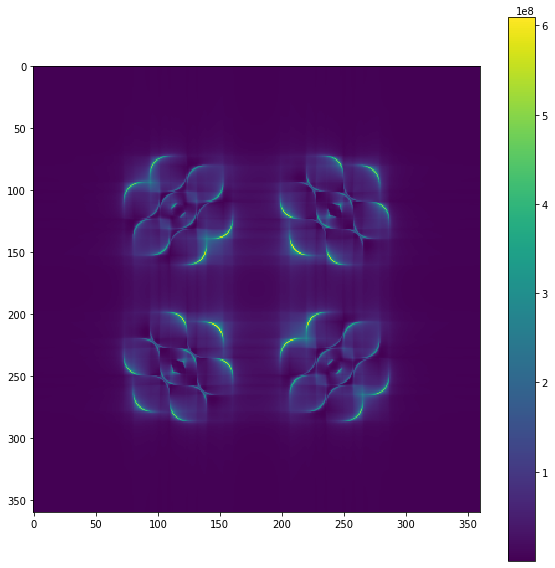

In [18]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [21]:
imgr = ceo.Imaging(N_PX_PUPIL=n-1,N_PX_IMAGE=64)

In [25]:
imgr.reset()
src>>(gmt,imgr)
+src
imgr.readOut(1e-3,0)

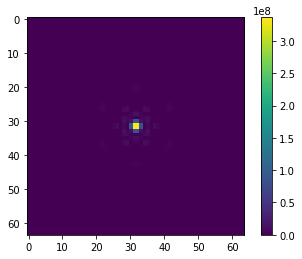

In [26]:
plt.imshow(imgr.frame.host())#/imgr.frame.host_data.max())
plt.colorbar()
#plt.clim([0,0.5])

In [80]:
imgr.frame.host_data.sum()/src.nPhoton/357

array([0.95508449])

In [5]:
src>>(gmt,pym)

In [6]:
pym.camera.reset()
pym.modulation = 0
+src
pym.camera.readOut(1e-6,15)

(@CEO)>Pyramid: Set modulation sampling to 0


In [7]:
pym.camera.frame.host().std()

44.454647

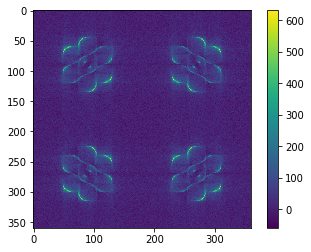

In [8]:
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [ ]:
pym.camera.

In [19]:
pym.camera.frame.host_data.sum()/(1e-6*src.nPhoton*357)

array([0.99791153])

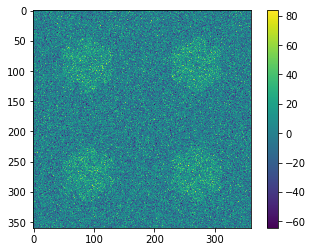

In [21]:
pym.camera.reset()
pym.modulation = 3
+src
pym.camera.readOut(1e-7,15)
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [92]:
pym.modulation_sampling

36

In [20]:
pym.camera.N_FRAME

1